In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('sms_spam.csv')

In [4]:
data.shape

(5559, 2)

In [5]:
data.head(10)

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
5,ham,Aiya we discuss later lar... Pick u up at 4 is...
6,ham,Are you this much buzy
7,ham,Please ask mummy to call father
8,spam,Marvel Mobile Play the official Ultimate Spide...
9,ham,"fyi I'm at usf now, swing by the room whenever"


In [6]:
# HAM:
# SPAM : Not required

In [8]:
data.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4812   4503                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [10]:
# Sorry, I'll call later is mostly repitiative message (30 Times)
# Please call our customer service representativ... (4 Times)

In [13]:
data['Length'] = data['text'].apply(len) # applying len function on text

In [12]:
data.head(10)

,type,text,Length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,spam,okmail: Dear Dave this is your final notice to...,161
5,ham,Aiya we discuss later lar... Pick u up at 4 is...,50
6,ham,Are you this much buzy,22
7,ham,Please ask mummy to call father,31
8,spam,Marvel Mobile Play the official Ultimate Spide...,160
9,ham,"fyi I'm at usf now, swing by the room whenever",46


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6381b6f60>,
      dtype=object)

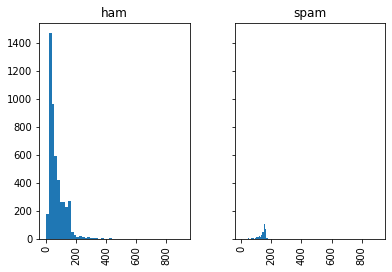

In [17]:
import matplotlib.pyplot as plt

data.hist(column='Length',bins=50,by='type',sharex=True,sharey=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6382ffda0>,
      dtype=object)

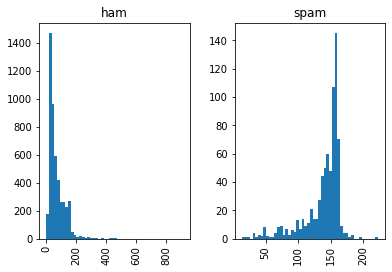

In [18]:
data.hist(column='Length',bins=50,by='type')

In [16]:
data.Length.describe()

count    5559.000000
mean       79.781436
std        59.105497
min         2.000000
25%        35.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: Length, dtype: float64

In [19]:
# Length is not usefull in classification 

In [55]:
import string
from nltk.corpus import stopwords

# Stopwords
stop_words = stopwords.words('english')


def clean_text(text):
    no_punch = [s for s in text if s not in string.punctuation] # it will remove punctuations ( if s not in string.punctuation)
    no_punch = ''.join(no_punch)
    remove_words = [w for w in no_punch.split() if w.lower() not in stop_words] # it will remove stopwords
    return ' '.join(remove_words)

In [56]:
data['train_text'] = data.text.apply(clean_text)

In [57]:
data.head(10)

,type,text,Length,train_text
0,ham,Hope you are having a good week. Just checking in,49,Hope good week checking
1,ham,K..give back my thanks.,23,Kgive back thanks
2,ham,Am also doing in cbe only. But have to pay.,43,also cbe pay
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,complimentary 4 STAR Ibiza Holiday £10000 cash...
4,spam,okmail: Dear Dave this is your final notice to...,161,okmail Dear Dave final notice collect 4 Teneri...
5,ham,Aiya we discuss later lar... Pick u up at 4 is...,50,Aiya discuss later lar Pick u 4
6,ham,Are you this much buzy,22,much buzy
7,ham,Please ask mummy to call father,31,Please ask mummy call father
8,spam,Marvel Mobile Play the official Ultimate Spide...,160,Marvel Mobile Play official Ultimate Spiderman...
9,ham,"fyi I'm at usf now, swing by the room whenever",46,fyi Im usf swing room whenever


In [58]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [59]:
bag_of_words = CountVectorizer()

In [60]:
bag_of_words.fit(data['train_text']) # counting number of repitation for each word
len(bag_of_words.vocabulary_)

9385

In [61]:
bag_of_words.vocabulary_

{'hope': 4185,
 'good': 3798,
 'week': 8946,
 'checking': 2123,
 'kgive': 4724,
 'back': 1458,
 'thanks': 8188,
 'also': 1158,
 'cbe': 2050,
 'pay': 6199,
 'complimentary': 2335,
 'star': 7759,
 'ibiza': 4304,
 'holiday': 4155,
 '10000': 293,
 'cash': 2028,
 'needs': 5704,
 'urgent': 8669,
 'collection': 2285,
 '09066364349': 260,
 'landline': 4845,
 'lose': 5084,
 'box434sk38wp150ppm18': 1771,
 'okmail': 5967,
 'dear': 2649,
 'dave': 2621,
 'final': 3403,
 'notice': 5842,
 'collect': 2282,
 'tenerife': 8149,
 '5000': 688,
 'award': 1426,
 'call': 1934,
 '09061743806': 222,
 'tcs': 8103,
 'sae': 7088,
 'box326': 1763,
 'cw25wx': 2564,
 '150ppm': 374,
 'aiya': 1107,
 'discuss': 2836,
 'later': 4873,
 'lar': 4858,
 'pick': 6294,
 'much': 5593,
 'buzy': 1909,
 'please': 6353,
 'ask': 1341,
 'mummy': 5608,
 'father': 3333,
 'marvel': 5267,
 'mobile': 5486,
 'play': 6342,
 'official': 5943,
 'ultimate': 8579,
 'spiderman': 7681,
 'game': 3657,
 '450': 640,
 'ur': 8666,
 'right': 6978,
 'tex

In [65]:
txt_transform = bag_of_words.transform(data.text) # data.text is what text to be tranformed
txt_transform.shape #vector

(5559, 9385)

In [64]:
print(txt_transform) #row , column, value

  (0, 2123)	1
  (0, 3798)	1
  (0, 4185)	1
  (0, 8946)	1
  (0, 9328)	1
  (1, 1458)	1
  (1, 3746)	1
  (1, 8188)	1
  (2, 1158)	1
  (2, 2050)	1
  (2, 6199)	1
  (3, 260)	1
  (3, 290)	1
  (3, 1771)	1
  (3, 2028)	1
  (3, 2285)	1
  (3, 2335)	1
  (3, 4155)	1
  (3, 4304)	1
  (3, 4845)	1
  (3, 5084)	1
  (3, 5704)	1
  (3, 7759)	1
  (3, 8669)	1
  (4, 222)	1
  :	:
  (5556, 8829)	1
  (5556, 9328)	1
  (5557, 493)	1
  (5557, 494)	1
  (5557, 965)	1
  (5557, 1215)	1
  (5557, 3108)	2
  (5557, 3117)	1
  (5557, 4103)	1
  (5557, 4512)	1
  (5557, 4643)	2
  (5557, 4782)	1
  (5557, 4898)	1
  (5557, 5301)	1
  (5557, 6631)	1
  (5557, 6682)	1
  (5557, 6899)	2
  (5557, 7469)	1
  (5557, 7539)	1
  (5557, 7865)	1
  (5557, 8666)	1
  (5558, 1934)	1
  (5558, 2649)	1
  (5558, 3497)	1
  (5558, 7310)	1


In [66]:
from sklearn.naive_bayes import MultinomialNB

In [67]:
mn = MultinomialNB()

In [69]:
mn.fit(txt_transform,data.type)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [70]:
mn.score(txt_transform,data.type)

0.9935240151106314

In [72]:
import pickle

with open('mn.pkl', 'wb') as f1: #mn is trained model
    pickle.dump(mn, f1)
    
# this will created the object and now we will not loose the trained model.

In [73]:
with open('mn.pkl','rb') as f1:
    saved = pickle.load(f1)

In [111]:
import random
ind = random.randint(0,len(data))
new_sms = data.iloc[ind][1]

# genrating random messgage

In [112]:
new_sms

'You have won a guaranteed £200 award or even £1000 cashto claim UR award call free on 08000407165 (18+) 2 stop getstop on 88222 PHP'

In [113]:
def ham_spam(text):
    test = bag_of_words.transform([clean_text(text)])
    print(saved.predict_proba(test))
    print(saved.predict(test))

In [114]:
ham_spam(new_sms)

[[3.63033479e-19 1.00000000e+00]]
['spam']
